In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
directory = './hotel_bookings.csv'
data = pd.read_csv(directory)

In [3]:
# Preview the data set:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [32]:
 repeated_guest = data[data['is_repeated_guest'] == 1]
repeated_guest_counts = repeated_guest.groupby('hotel').size()
repeated_guest_counts

hotel
City Hotel       181
Resort Hotel    1778
dtype: int64

### Using the dataset provided, complete the block of code in the cells below

1. Complete the code to visualize the booking counts for each hotel type, excluding canceled bookings. Replace all the question marks '?' within the code snippet below to achieve this:

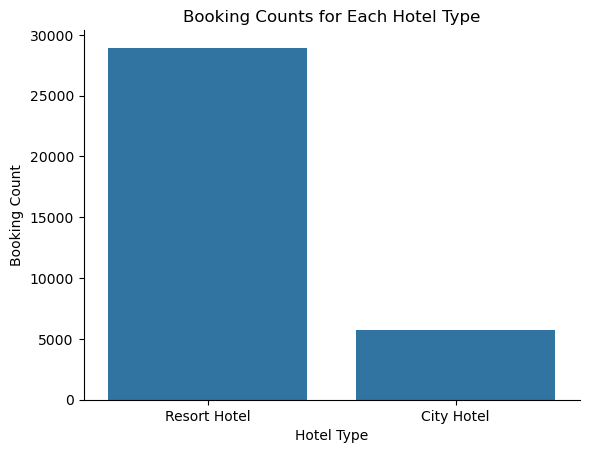

In [24]:
def plot_hotel_booking_counts(data):
    hotel_booking = data[data['is_canceled'] != 1]
    hotel_booking_counts = hotel_booking['hotel'].value_counts()
    sns.barplot(x=hotel_booking_counts.index, y=hotel_booking_counts)
    plt.title("Booking Counts for Each Hotel Type")
    plt.xlabel("Hotel Type")
    plt.ylabel("Booking Count")
    sns.despine()

# Call the function to plot
plot_hotel_booking_counts(data)

2. Complete the code to visualize the number of repeated guests for each hotel type. Replace all the question marks '?' within the code snippet below to achieve this

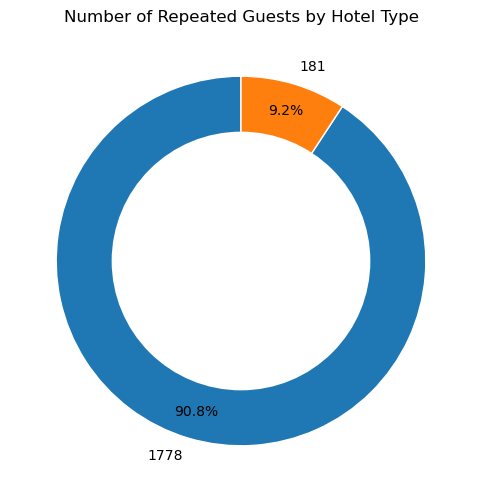

In [ ]:
def plot_repeated_guest_counts(data):
    repeated_guest = data[data['is_repeated_guest'] == 1]
    repeated_guest_counts = repeated_guest['hotel'].value_counts()

    plt.figure(figsize=(8, 6))

    #Replace the question marks with the appropriate entries
    plt.pie(x=repeated_guest_counts, labels=repeated_guest_counts, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'edgecolor': 'white'},)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title("Number of Repeated Guests by Hotel Type")
    plt.show()

# Call the function to create the donut plot
plot_repeated_guest_counts(data)

3. Complete the code to visualize the distribution of customer types using a pie chart. Replace all the question marks '?' within the code snippet below to achieve this

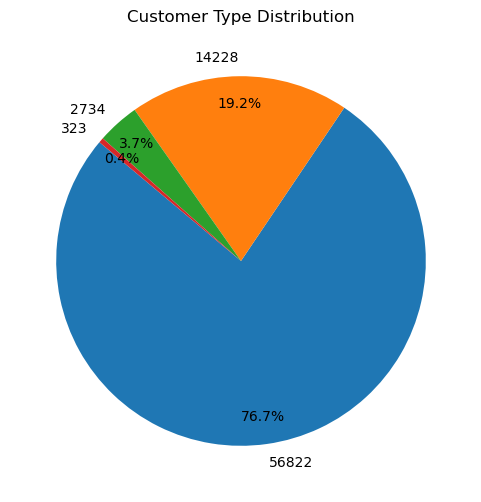

In [ ]:
def plot_customer_type_pie(data):
    customer_type_counts = data['customer_type'].value_counts()# Calculate customer type counts
    plt.figure(figsize=(6, 6))
    plt.pie(x=customer_type_counts, labels=customer_type_counts, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    plt.title("Customer Type Distribution")
    plt.show()

# Call the function to create the pie plot of customer type distribution
plot_customer_type_pie(data)

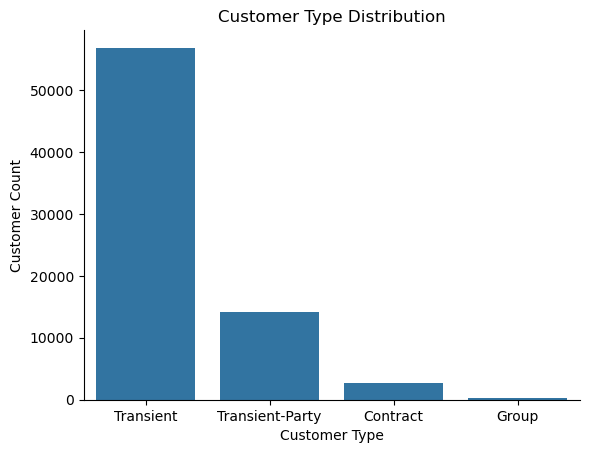

In [37]:

def plot_customer_type_pie(data):
    customer_type_counts = data['customer_type'].value_counts()# Calculate customer type counts
    sns.barplot(x=customer_type_counts.index, y=customer_type_counts)
    plt.title("Customer Type Distribution")
    plt.xlabel("Customer Type")
    plt.ylabel("Customer Count")
    sns.despine()

# Call the function to create the pie plot of customer type distribution
plot_customer_type_pie(data)





4. Complete the code to visualize the patterns of cancellations by month for each hotel type. Replace all the question marks '?' within the code snippet below to achieve this:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


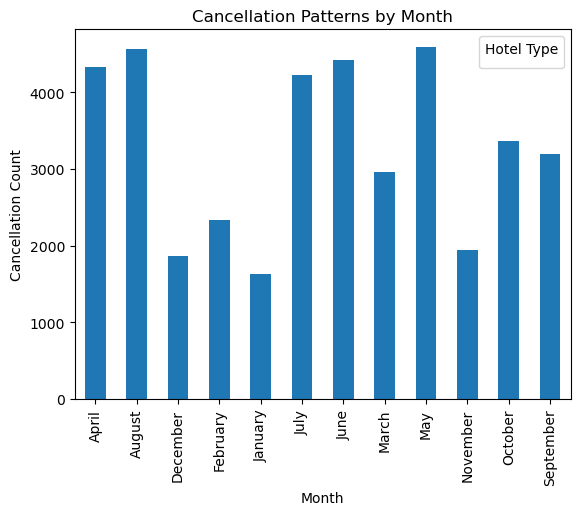

In [42]:
monthly_cancel_counts = data[data['is_canceled']==1].groupby('arrival_date_month').size() # Calculate the monthly cancellation counts for each hotel type
monthly_cancel_counts.plot(kind='bar') # Create a bar plot to visualize cancellation patterns by month

plt.title('Cancellation Patterns by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Count')
plt.legend(title='Hotel Type')
plt.show()

5. Complete the code to visualize the distribution of reservation status (canceled, check-out, no-show) for each hotel type. Replace all the question marks '?' within the code snippet below to achieve this

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


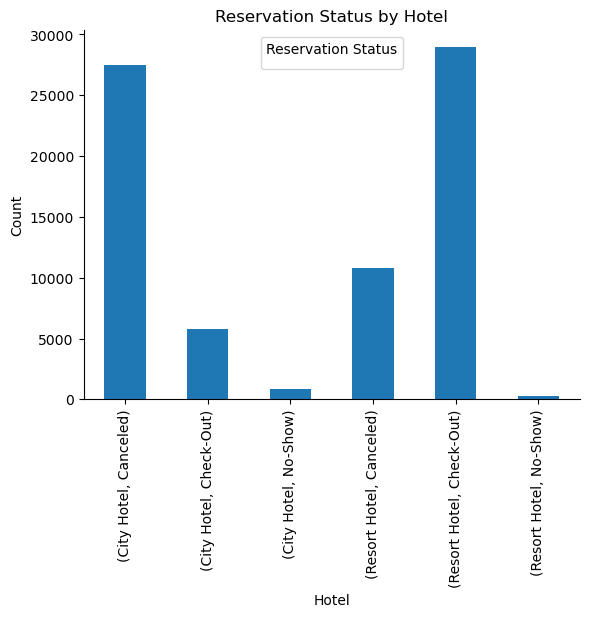

In [45]:
# Create a count plot to visualize reservation status by hotel
count_reservation = data.groupby(['hotel','reservation_status']).size()
count_reservation.plot(kind='bar')
plt.title("Reservation Status by Hotel")
plt.xlabel("Hotel")
plt.ylabel("Count")

plt.legend(title="Reservation Status")
sns.despine()
plt.show()